[link text](https://github.com/sanjaykhadanga/credit-card-default-prediction/blob/main/Credit_Card_Default_Prediction_(sanjay)_Capstone_Project.ipynb)

# **About the Dataset**

**Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content**
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender
  * 1=male, 
  * 2=female
* EDUCATION: 
  * 1=graduate school, 
  * 2=university, 
  * 3=high school, 
  * 0, 4, 5, 6=others)
* MARRIAGE: Marital status 
  * 1=married, 
  * 2=single, 
  * 3=divorce, 
  * 0=others
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 
    * -2: No consumption; 
    * -1: Paid in full; 
    * 0: The use of revolving credit; 
    * 1 = payment delay for one month; 
    * 2 = payment delay for two months; 
      . 
      . 
      .; 
    * 8 = payment delay for eight months; 
    * 9 = payment delay for nine months and above.
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment 
  * 1=yes, 
  * 0=no

**Inspiration**
Some ideas for exploration:

* How does the probability of default payment vary by categories of different demographic variables?
* Which variables are the strongest predictors of default payment?


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
%cd /content
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset
!unzip \*.zip  && rm *.zip

/content
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 123MB/s]
Archive:  default-of-credit-card-clients-dataset.zip
  inflating: UCI_Credit_Card.csv     


# **Import libraries and Dataset**

In [ ]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT STARTS RUNNING!')

INFO:root:PROJECT STARTS RUNNING!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import pickle

logger.info('LIBRARIES IMPORTED')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
INFO:root:LIBRARIES IMPORTED


In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
print(df.loc[2,:])

ID                                3.0
LIMIT_BAL                     90000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          2.0
AGE                              34.0
PAY_0                             0.0
PAY_2                             0.0
PAY_3                             0.0
PAY_4                             0.0
PAY_5                             0.0
PAY_6                             0.0
BILL_AMT1                     29239.0
BILL_AMT2                     14027.0
BILL_AMT3                     13559.0
BILL_AMT4                     14331.0
BILL_AMT5                     14948.0
BILL_AMT6                     15549.0
PAY_AMT1                       1518.0
PAY_AMT2                       1500.0
PAY_AMT3                       1000.0
PAY_AMT4                       1000.0
PAY_AMT5                       1000.0
PAY_AMT6                       5000.0
default.payment.next.month        0.0
Name: 2, dtype: float64


In [ ]:
logger.info('DATA IMPORTED AND EXTRACTED TO DATAFRAME!')

INFO:root:DATA IMPORTED AND EXTRACTED TO DATAFRAME!


# **Data Exploration**

In [ ]:
logger.info('DATA EXPLORATION STARTS!')

INFO:root:DATA EXPLORATION STARTS!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

We observe that, we have
- 30000 rows and 25 columns
- 24 independent variables with 'default' as the dependent variable
- 13 float and 12 int type variables
- All variables with datatype int64, except AGE seem to be categorical variables. 

(Note: We do not take ID into consideration here)
- All variables with datatype float64 seem to be numeric variables


And, for our convenience in analysing, lets change the column namess of 'PAY_0' to 'PAY_1' and 'default.payment.next.month' to 'default'.

In [ ]:
# Remove duplicate rows, if any
df.drop_duplicates(keep=False)
df.shape

(30000, 25)

In [ ]:
# Rename the column 'default.payment.next.month' to 'default' for ease of use and
# Rename PAY_0 to PAY_1 for convenience
df.rename(columns={'default.payment.next.month': 'default', 'PAY_0':'PAY_1'}, inplace=True)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**MISSING VALUES**

In [ ]:
# Check for missing values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

No missing values.
***********************************************************************

## **Numerical Variables**

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES STARTS!


In [ ]:
# Summary statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes == 'float64'] + ['AGE']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
0,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,24
1,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,26
2,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,34
3,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,37
4,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,57


In [ ]:
# Check the number of unique values for the numerical variables
for col in numerical_features:
  print(col, df[col].nunique())

LIMIT_BAL 81
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939
AGE 56


### **Discrete Variables**

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES: DISCRETE VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES: DISCRETE VARIABLES STARTS!


**Distribution of Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_ma

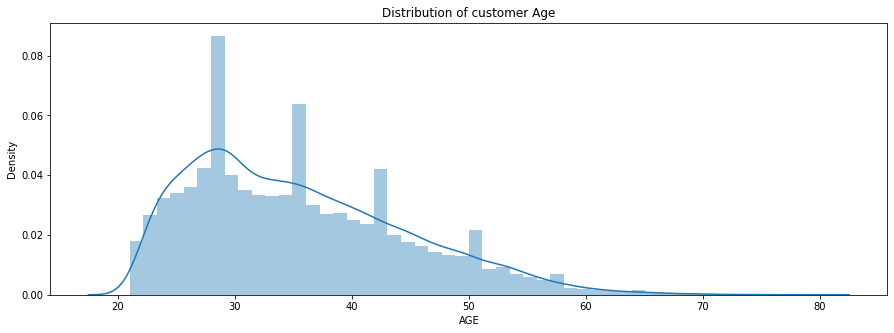

In [ ]:
# Distribution of age of customers
plt.figure(figsize = (15,5))
plt.title('Distribution of customer Age')
sns.distplot(df['AGE'])
plt.show()

We see that most of the customers fall under the age group 20 to 40.

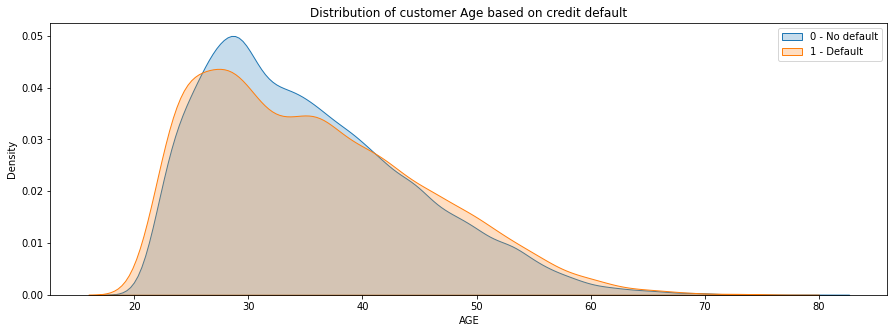

In [ ]:
# Distribution of age of customers based on default value
plt.figure(figsize=(15, 5))
plt.title('Distribution of customer Age based on credit default')
sns.kdeplot(df.loc[(df['default'] == 0), 'AGE'], label = '0 - No default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'AGE'], label = '1 - Default', shade = True)
plt.legend()
plt.show()

We can observe from the above graph that for customers between the age bracket 20-40(where most of our customers exist), the % of customers who did not default the payment is higher than % of customer who defaulted.

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES:DISCRETE VARIABLE ENDS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES:DISCRETE VARIABLE ENDS!


### **Continuous Variables**

In [ ]:
logger.info('DATA EXPLORATION: CONTINUOUS VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: CONTINUOUS VARIABLES STARTS!


**LIMIT_BAL**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


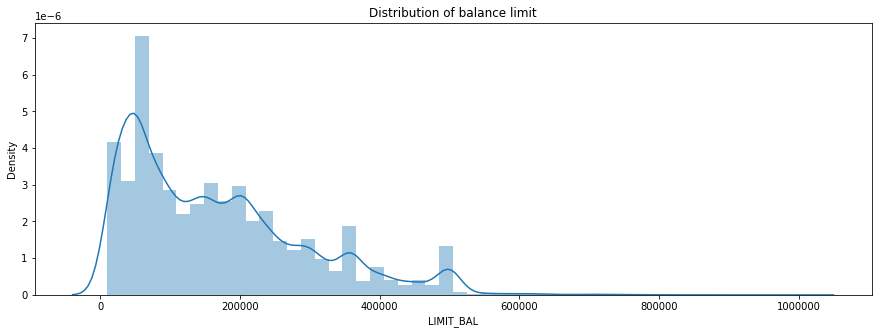

In [ ]:
# Distribution of age of customers
plt.figure(figsize = (15,5))
plt.title('Distribution of balance limit')
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

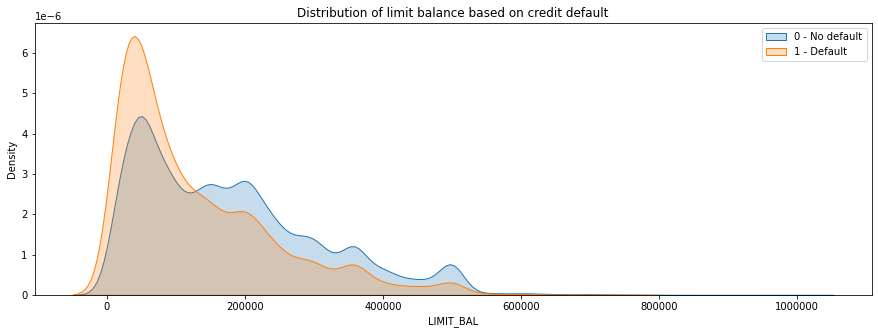

In [ ]:
# Distribution of age of customers based on default value
plt.figure(figsize=(15, 5))
plt.title('Distribution of limit balance based on credit default')
sns.kdeplot(df.loc[(df['default'] == 0), 'LIMIT_BAL'], label = '0 - No default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'LIMIT_BAL'], label = '1 - Default', shade = True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

From the above graphs, we see that most of the customers have a limit balance under 200000. Also, the chances of these customers to default is higher than the customers outside the range(0 to 200000).

**BILL_AMT1 to BILL_AMT6**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


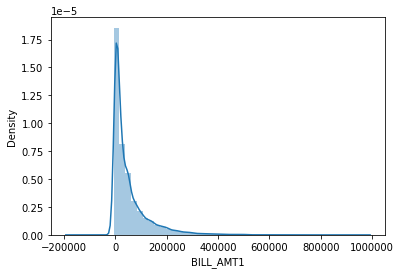

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


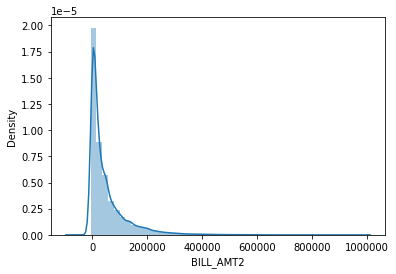

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


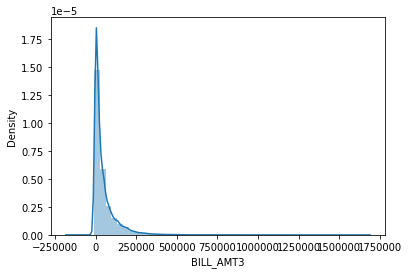

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


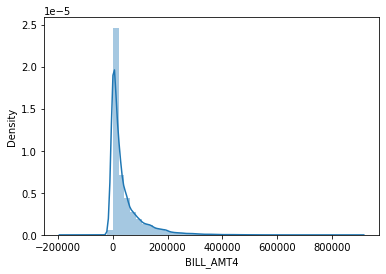

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


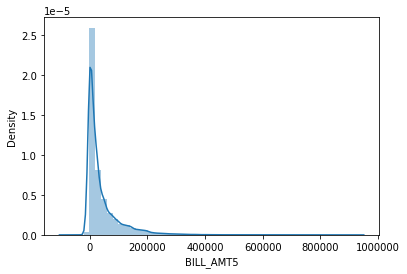

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


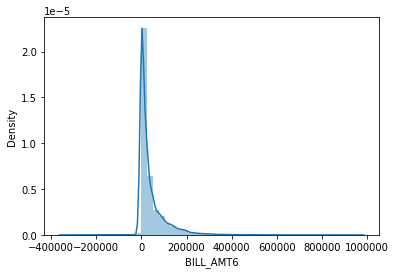

In [ ]:
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for col in bill_amt_cols:
    sns.distplot(df[col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.xlabel(col)
    plt.show()

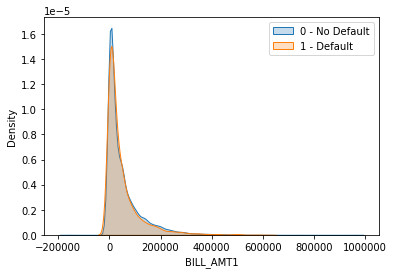

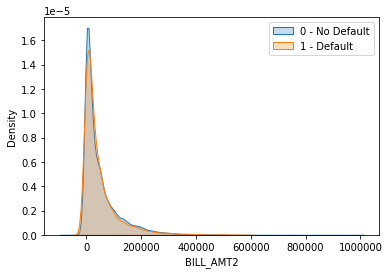

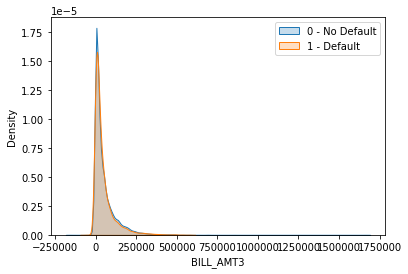

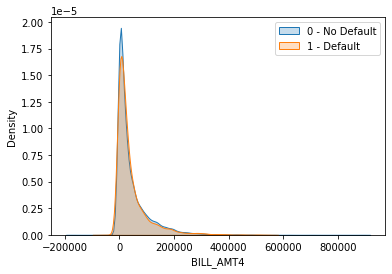

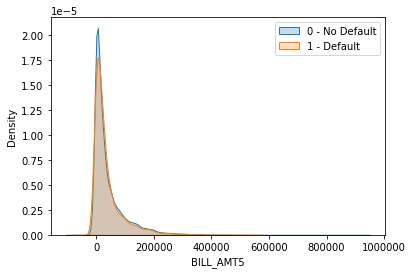

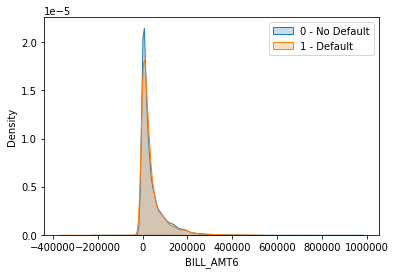

In [ ]:
for col in bill_amt_cols:
    sns.kdeplot(df.loc[(df['default'] == 0), col], label = '0 - No Default', shade = True)
    sns.kdeplot(df.loc[(df['default'] == 1), col], label = '1 - Default', shade = True)
    #plt.xlim(-50000,200000)
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()    
    plt.xlabel(col)
    plt.show()

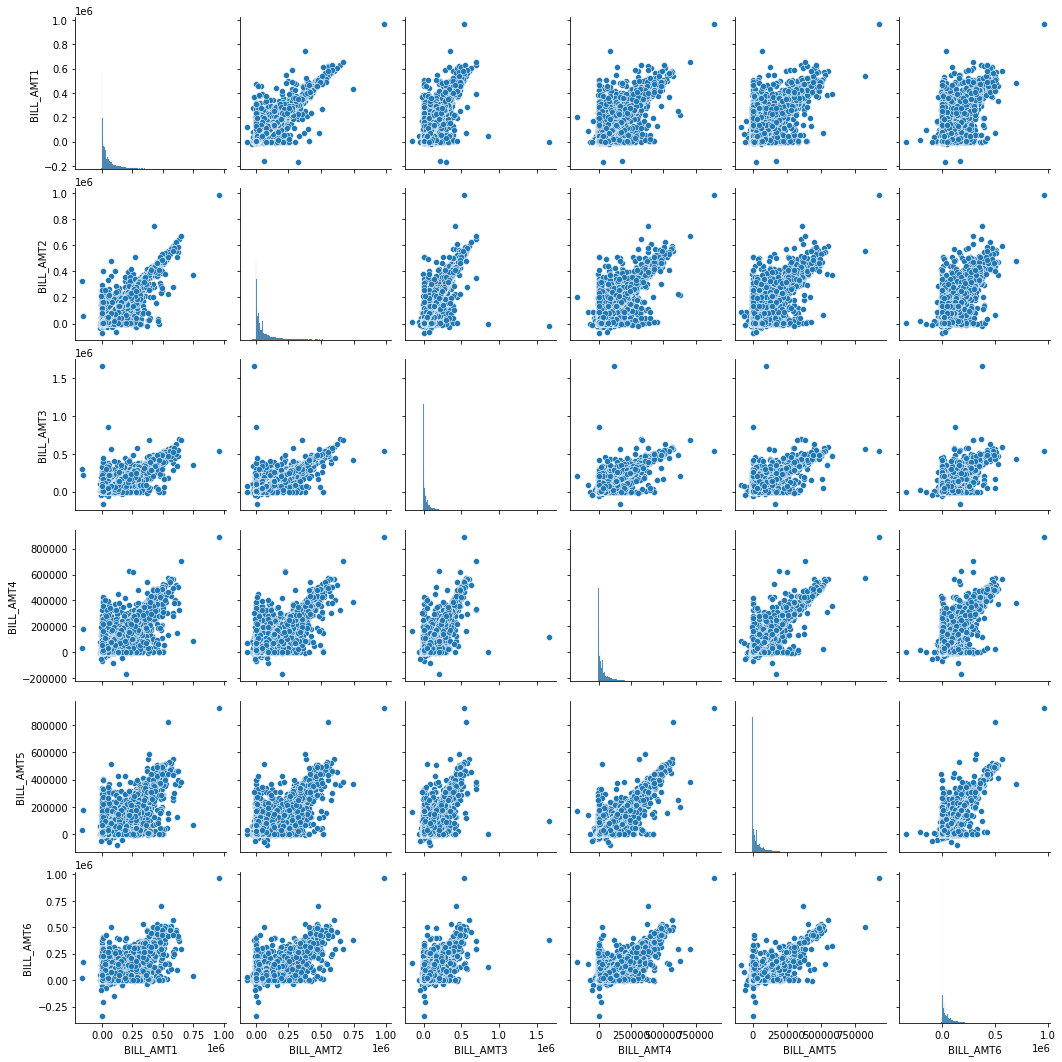

In [ ]:
#plotting the pair plot for bill amount 
sns.pairplot(data = df[bill_amt_cols])

We can definitely see that there is some correlation between bill amounts of the 6 months.

**PAY_AMT1 to PAY_AMT6**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


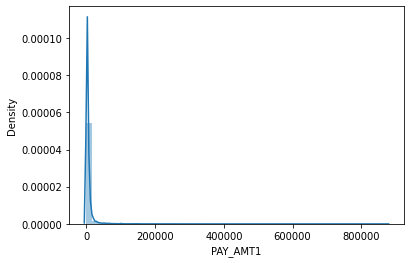

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


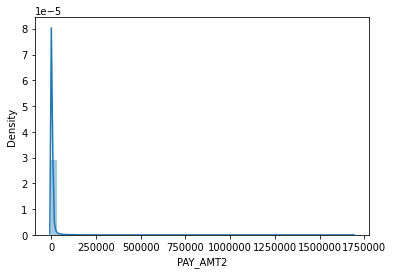

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


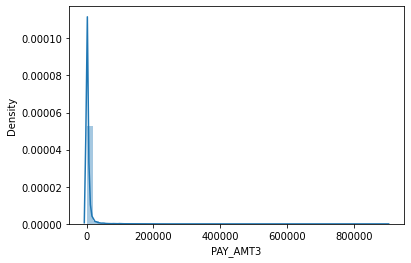

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


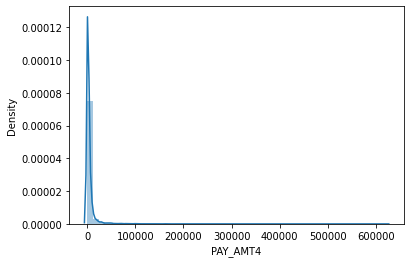

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


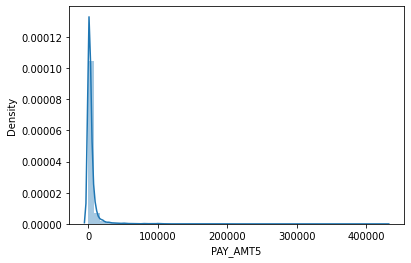

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


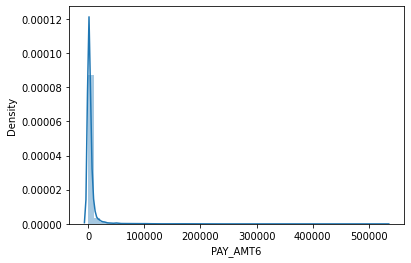

In [ ]:
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in pay_amt_cols:
    sns.distplot(df[col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.xlabel(col)
    plt.show()

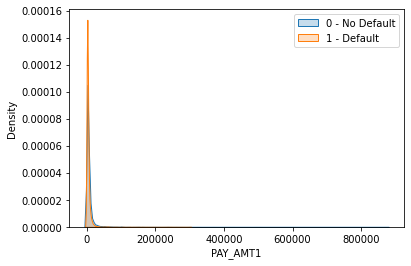

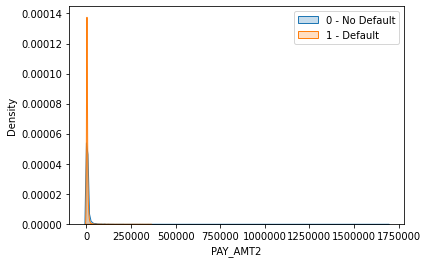

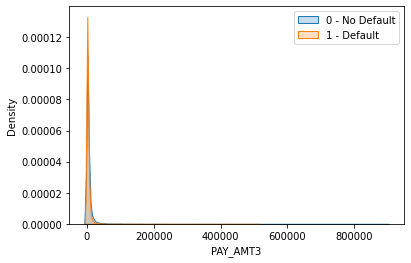

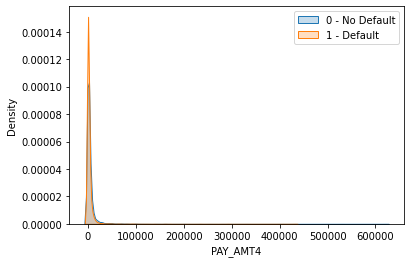

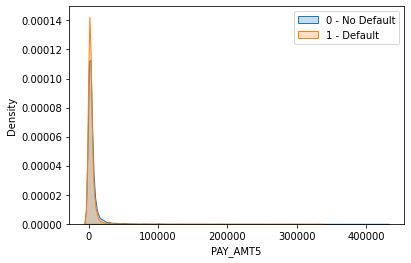

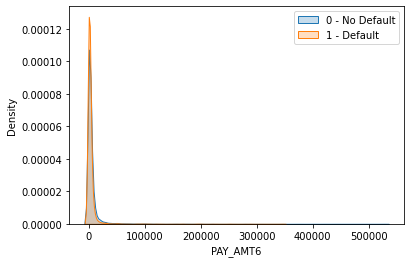

In [ ]:
for col in pay_amt_cols:
    sns.kdeplot(df.loc[(df['default'] == 0), col], label = '0 - No Default', shade = True)
    sns.kdeplot(df.loc[(df['default'] == 1), col], label = '1 - Default', shade = True)
    #plt.xlim(-50000,200000)
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()    
    plt.xlabel(col)
    plt.show()

<Figure size 1440x1440 with 0 Axes>

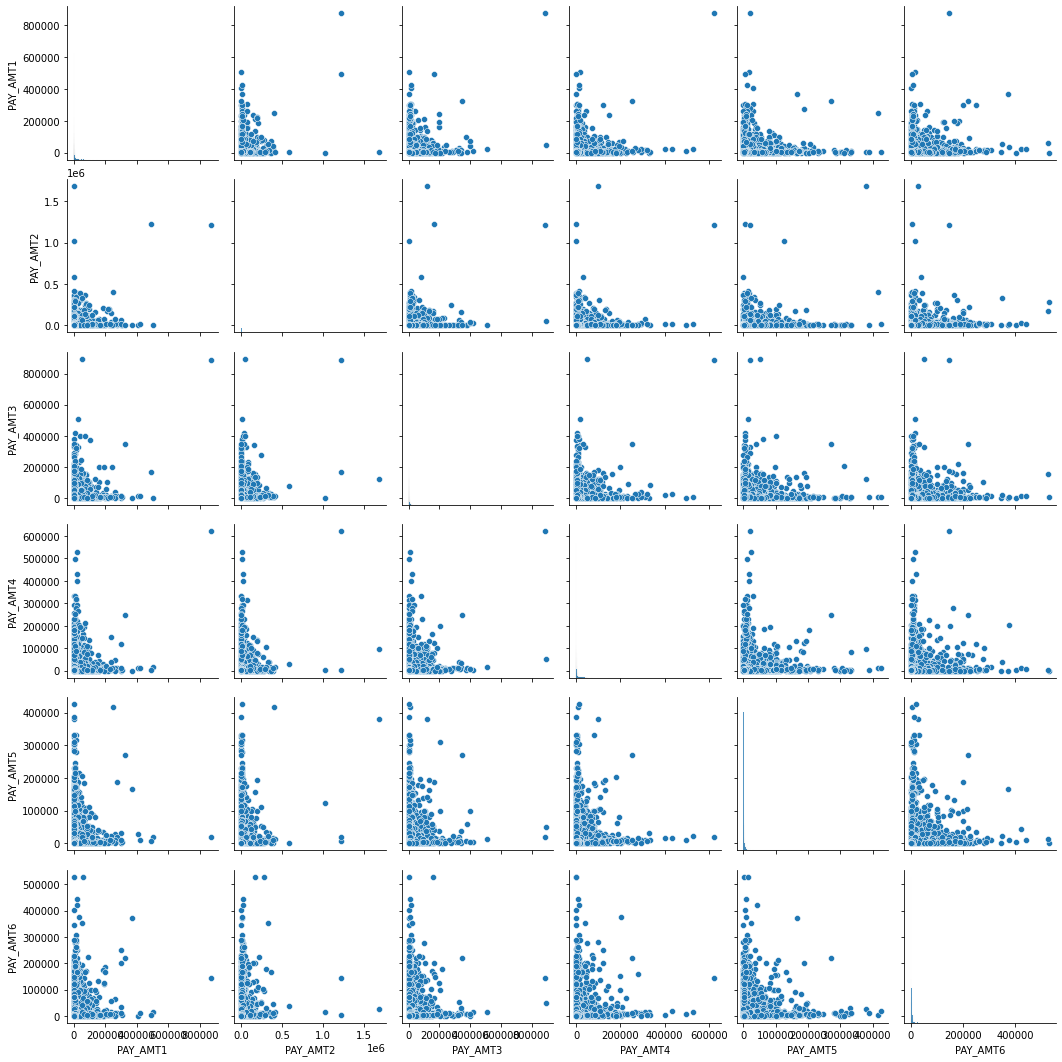

In [ ]:
#plotting the pair plot for bill amount 
plt.figure(figsize=(20, 20))
sns.pairplot(data = df[pay_amt_cols])

Here also, we can see that there is a correlation between the values of previous payment amounts between the months from April-September.

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES: CONTINUOUS VARIABLES ENDS!')
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES ENDS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES: CONTINUOUS VARIABLES ENDS!
INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES ENDS!


## **Categorical Variables**

In [ ]:
logger.info('DATA EXPLORATION: CATEGORICAL VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: CATEGORICAL VARIABLES STARTS!


In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='int64']
categorical_features.remove('AGE')
categorical_features.remove('ID')

In [ ]:
df[categorical_features].head()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,2,2,1,2,2,-1,-1,-2,-2,1
1,2,2,2,-1,2,0,0,0,2,1
2,2,2,2,0,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0,0


In [ ]:
# Find the number of unique categories for each categorical variables
feature_name = []
no_of_category = []
for col in categorical_features:
  feature_name.append(col)
  no_of_category.append(len(df[col].unique()))

In [ ]:
cat_df = pd.DataFrame({'feature_name':feature_name, 
                       'no_of_category':no_of_category})
cat_df

,feature_name,no_of_category
0,SEX,2
1,EDUCATION,7
2,MARRIAGE,4
3,PAY_1,11
4,PAY_2,11
5,PAY_3,11
6,PAY_4,11
7,PAY_5,10
8,PAY_6,10
9,default,2


We can observe here that variables PAY_1 to PAY_6 have 10-11 categories in the dataset, when the data description mentions a total of 12 categories. Lets check which category/categories are missing in each of those variables.

In [ ]:
missing_dic = {}
missing_list = []
for col in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  missing_cats = []
  for cat in [-2,-1,0,1,2,3,4,5,6,7,8,9]:
    if cat not in df[col].unique():
      missing_cats.append(cat)
  print(col,' :', missing_cats)
  missing_list.append(missing_cats)
  missing_dic[col] = missing_cats


PAY_1  : [9]
PAY_2  : [9]
PAY_3  : [9]
PAY_4  : [9]
PAY_5  : [1, 9]
PAY_6  : [1, 9]


So, now we know about the missing categories in each of the above variables.
We shall handle them in the feature engineering stage.

**Dependent variable : 'default'**

First, lets look into the dependent variable.

In [ ]:
# counts the dependent variable data set
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


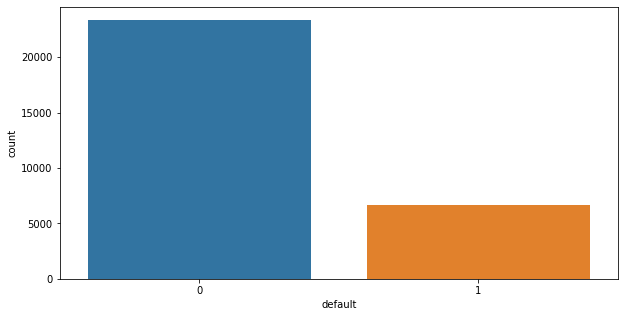

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('default', data = df)

We observe that 
- About one fourth of the total customers have defaulted(default=1).
- We have an imbalanced dataset.

**SEX**

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

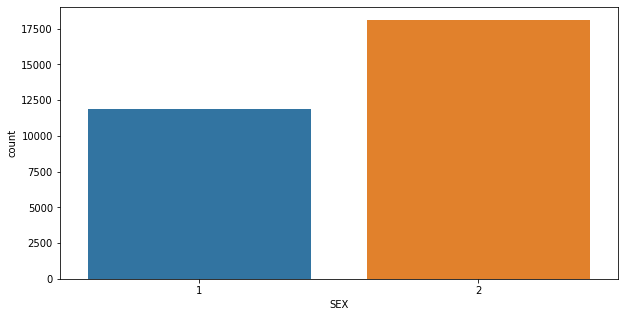

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = df)

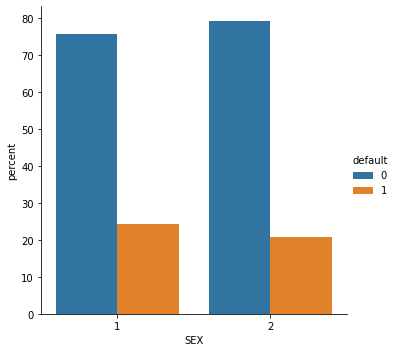

In [ ]:
(df.groupby('SEX')['default'].value_counts(normalize=True).mul(100)
                                                     .rename('percent')
                                                     .reset_index()
                                                     .pipe((sns.catplot,'data'), x='SEX',y='percent',hue='default',kind='bar'))

Takeaway:
- There are more female customer than male customers.
- The proportion of defaulters are more in males than females.

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

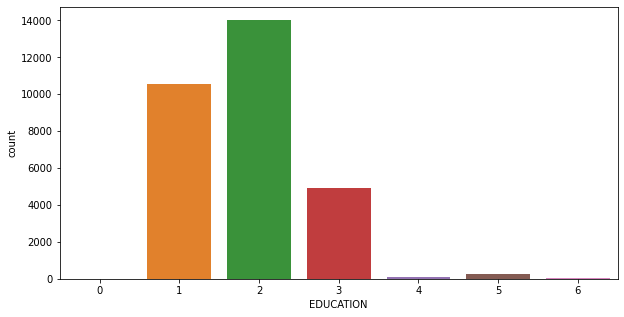

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = df)

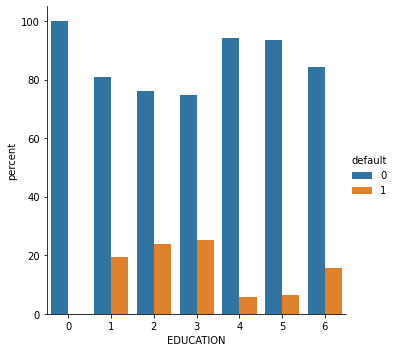

In [ ]:
(df.groupby('EDUCATION')['default'].value_counts(normalize=True).mul(100)
                                                     .rename('percent')
                                                     .reset_index()
                                                     .pipe((sns.catplot,'data'), x='EDUCATION',y='percent',hue='default',kind='bar'))

Now, according to the data description,
- 1=graduate school,
- 2=university,
- 3=high school,
- 0, 4, 5, 6=others.

Since the categories 4, 5, 6 and 0 are smaller in terms of count, we shall combine 0,4,5,6 to 0.

Even then, we shall observe that,
- University students followed by Graduates are the majority customers.
- The majority proportion of defaulters are also the university students.


**Marriage**

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

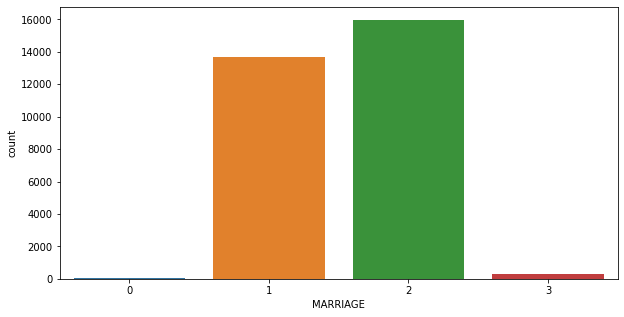

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = df)

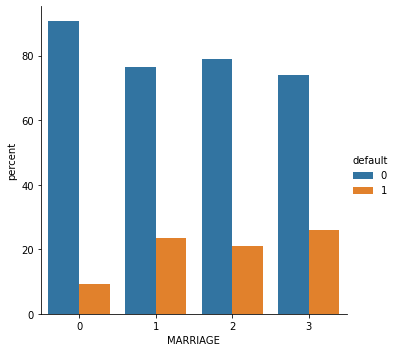

In [ ]:
(df.groupby('MARRIAGE')['default'].value_counts(normalize=True).mul(100)
                                                     .rename('percent')
                                                     .reset_index()
                                                     .pipe((sns.catplot,'data'), x='MARRIAGE',y='percent',hue='default',kind='bar'))

From the data description, we know that,
- 1=married,
- 2=single,
- 3=divorce,
- 0=others

We shall combine the categories divorce and others in to a single category others=3, since the percentage of customers in both of these categories are very small and there is no proper explanation in the description for the category 'others'(0).

**PAY_1 to PAY_6**

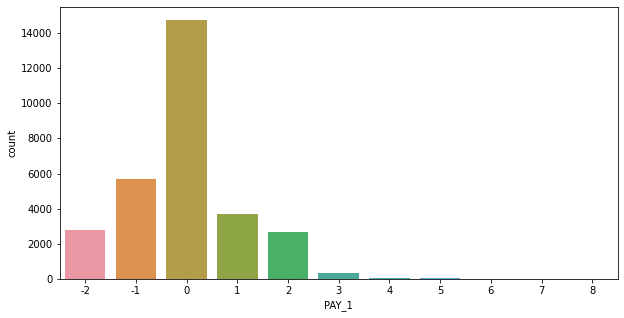

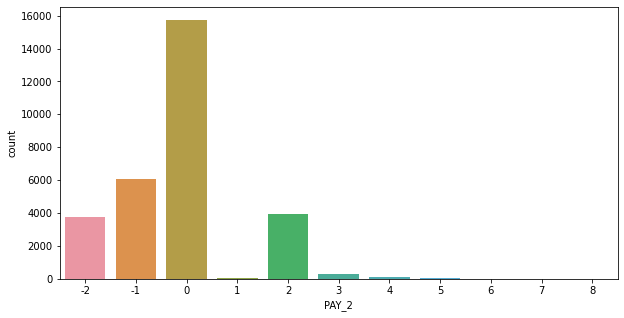

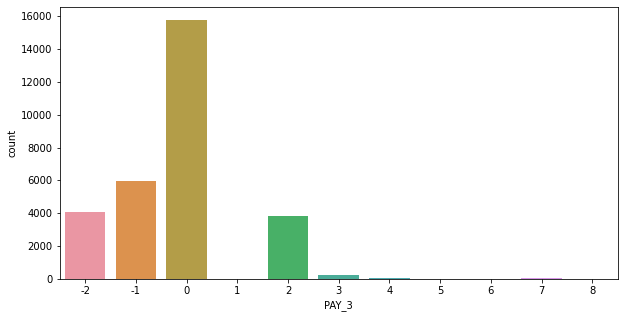

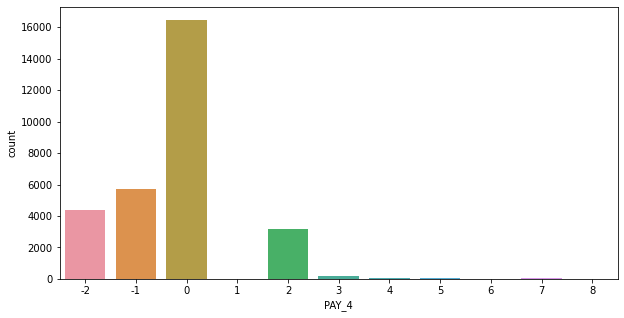

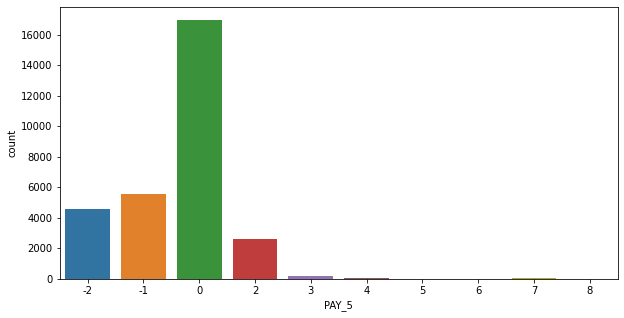

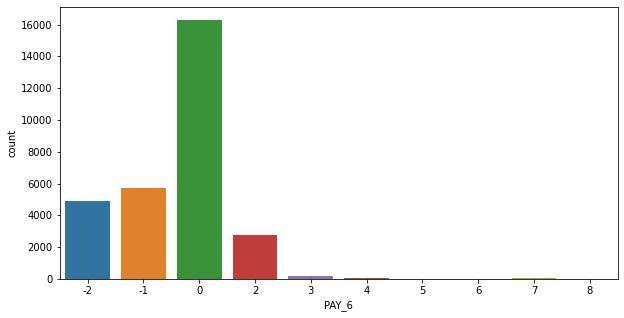

In [ ]:
pay_cols = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6']
for col in pay_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, data = df)

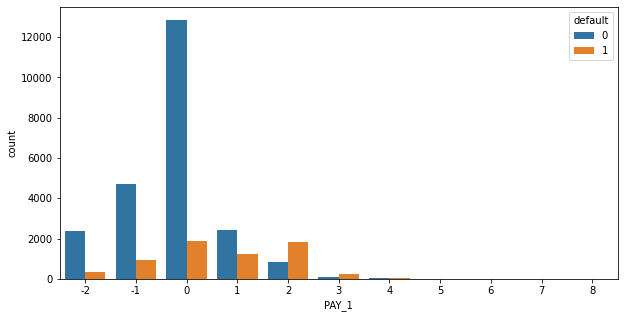

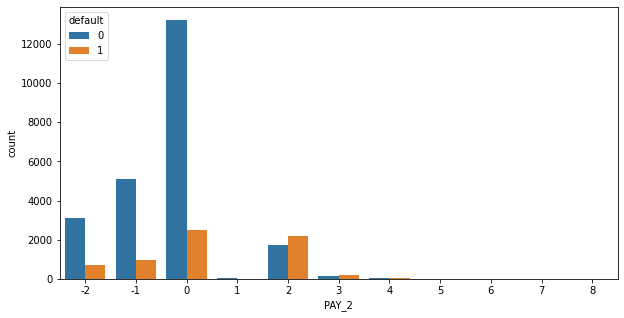

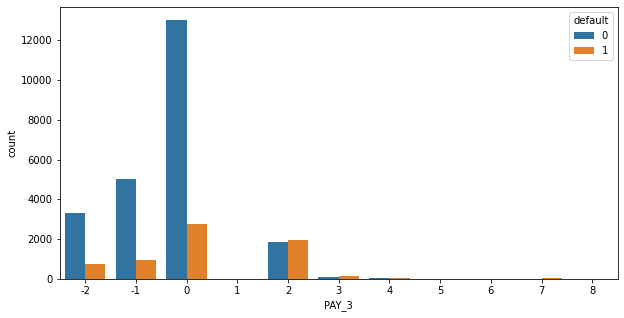

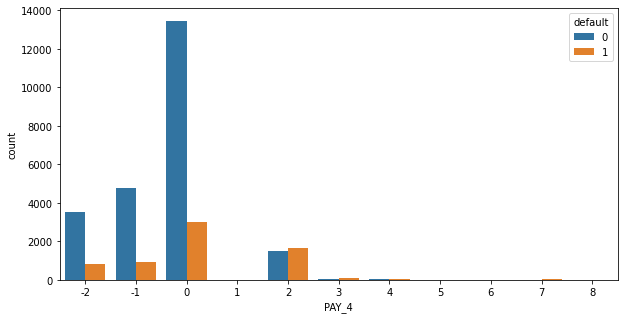

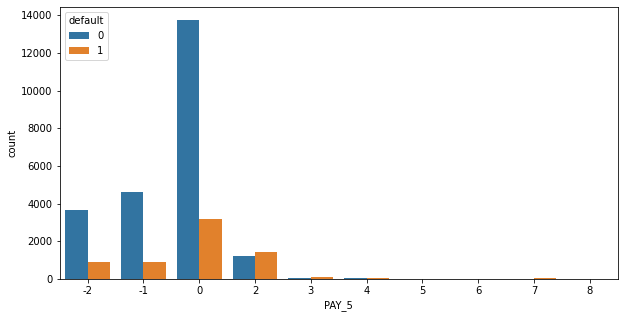

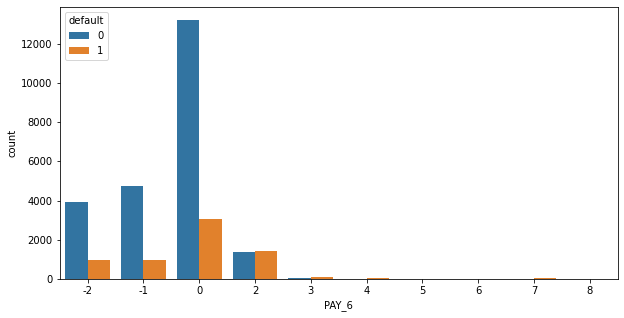

In [ ]:
for col in pay_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default', data = df)

In [ ]:
logger.info('DATA EXPLORATION: CATEGORICAL VARIABLES ENDS!')

INFO:root:DATA EXPLORATION: CATEGORICAL VARIABLES ENDS!


## **Correlation** 

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f11daa31dd0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f11daa31dd0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


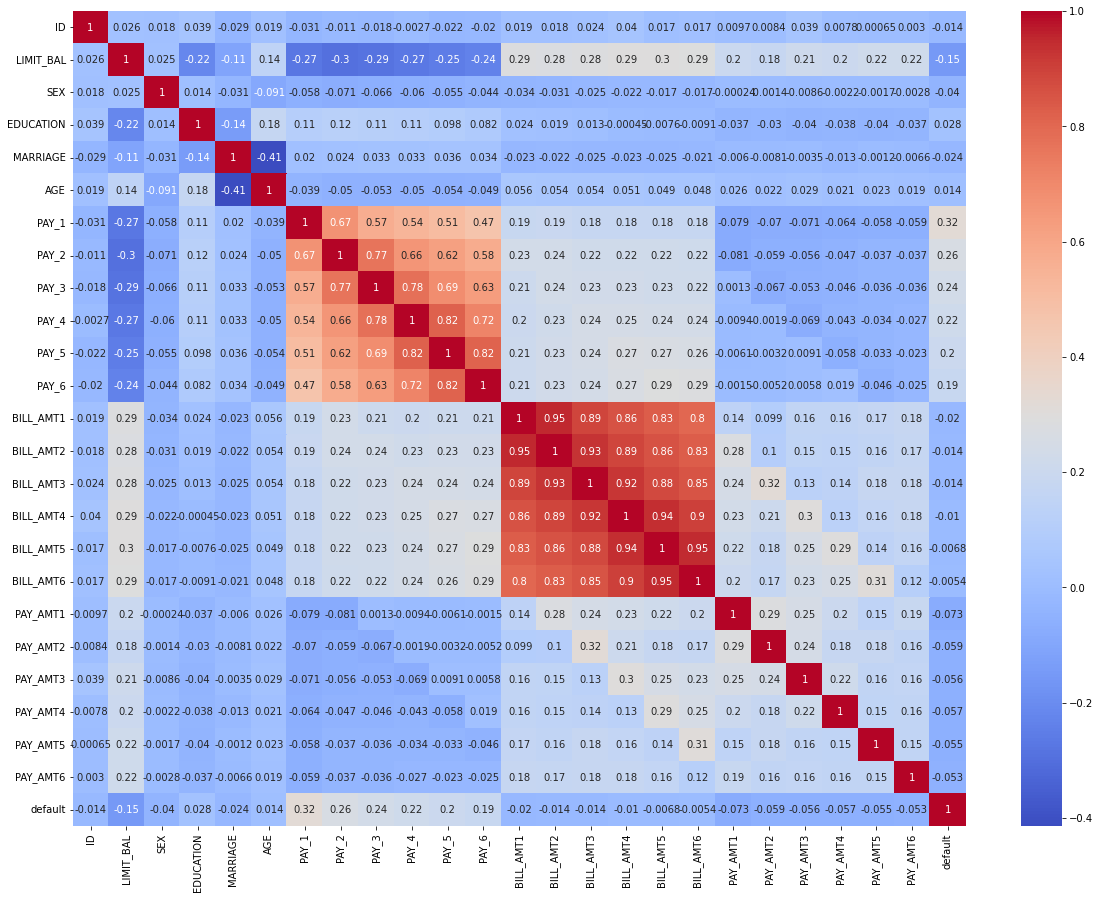

In [ ]:
#plotting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# **Feature Engineering**

In [ ]:
logger.info('FEATURE ENGINEERING STARTS!')

INFO:root:FEATURE ENGINEERING STARTS!


## **Handling the imbalance of data using SMOTE**

In [ ]:
logger.info('HANDLING IMBALANCED DATA STARTS!')

INFO:root:HANDLING IMBALANCED DATA STARTS!


In [ ]:
smote = SMOTE()

In [ ]:
X = df.iloc[:,:-1]
y = df['default']

In [ ]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['default'] = y_smote

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


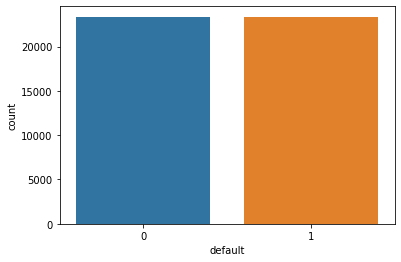

In [ ]:
#plot to check if the dataframe is balanced after smote
sns.countplot('default', data = df_final)

In [ ]:
df_final.default.value_counts()

1    23364
0    23364
Name: default, dtype: int64

In [ ]:
logger.info('HANDLING IMBALANCED DATA ENDS!')

INFO:root:HANDLING IMBALANCED DATA ENDS!


Done!

Next, we need to perform One Hot Encoding on the categorical variables.
But before that, we need to work on the following points:
- Change column names PAY_1 to PAY_6 as PAY_SEPT, PAY_AUG, PAY_JULY, PAY_JUNE, PAY_MAY AND PAY_SEPT.
- Change column names PAY_AMT1 to PAY_AMT6 to PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JULY, PAY_AMT_JUNE, PAY_AMT_MAY AND PAY_AMT_SEPT.
- Change column names BILL_AMT1 to BILL_AMT6 to BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JULY, BILL_AMT_JUNE, BILL_AMT_MAY AND BILL_AMT_SEPT.
- Change values in SEX: 
  - 1-Male and 
  - 2-Female
- Change values in EDUCATION : 
  - 1 : Graguation
  - 2 : University
  - 3 : High School
  - 0,4,5,6 : Others
- Change values in Marriage:
  - 1 : Married
  - 2 : Single
  - 3 : Others


In [ ]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Change column names PAY_1 to PAY_6
df_final.rename(columns={'PAY_1':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df_final.shape

(46728, 25)

## **Encoding categorical variables**

In [ ]:
logger.info('ENCODING CATEGORICAL VARIABLE STARTS!')

INFO:root:ENCODING CATEGORICAL VARIABLE STARTS!


In [ ]:
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 
                                'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL'])

df_final.head()

,ID,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,...,PAY_APRIL_-1,PAY_APRIL_0,PAY_APRIL_1,PAY_APRIL_2,PAY_APRIL_3,PAY_APRIL_4,PAY_APRIL_5,PAY_APRIL_6,PAY_APRIL_7,PAY_APRIL_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,1,0,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,1,0,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(df_final.columns)

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE',
       'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'default', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduation', 'EDUCATION_High_School', 'EDUCATION_Others',
       'EDUCATION_University', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single', 'PAY_SEPT_-2', 'PAY_SEPT_-1', 'PAY_SEPT_0',
       'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5',
       'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-2', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JULY_-2',
       'PAY_JULY_-1', 'PAY_JULY_0', 'PAY_JULY_1', 'PAY_JULY_2', 'PAY_JULY_3',
       'PAY_JULY_4', 'PAY_JULY_5', 'PAY_JULY_6', 'PAY_JULY_7', 'PAY_JULY_8',
       'PAY_JUNE_-2', 'PAY_JUNE_-1', 'PAY_

We can see that after encoding categorical variables, we can see a total of only 91 columns as opposed to the actual number of columns needed, ie, 97 columns. This is because of the reason discussed under the data exploration section for categorical variables, above. Therefore, we shall add the columns corresponding to the missing categorical value(s) for each month and fill it with 0 values. 

While observing the datframe after encoding, we realise that columns from PAY_1 through PAY_6 for category 9 is missing. Therefore, we shall add those columns.

In [ ]:
df_final[['PAY_SEPT_9', 'PAY_AUG_9', 'PAY_JULY_9',
    'PAY_JUNE_9', 'PAY_MAY_9', 'PAY_APRIL_9']] = 0

In [ ]:
df_final.head()

,ID,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,...,PAY_APRIL_5,PAY_APRIL_6,PAY_APRIL_7,PAY_APRIL_8,PAY_SEPT_9,PAY_AUG_9,PAY_JULY_9,PAY_JUNE_9,PAY_MAY_9,PAY_APRIL_9
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,0,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We drop the column ID as it is of not use for our modeling
df_final.drop('ID',axis = 1, inplace = True)

In [ ]:
df_final.shape

(46728, 96)

In [ ]:
logger.info('ENCODING CATEGORICAL VARIABLE ENDS!')

INFO:root:ENCODING CATEGORICAL VARIABLE ENDS!


In [ ]:
#df['default'] = df['default'].astype(int)

# **Modeling**

In [ ]:
logger.info('MODELING STARTS!')

INFO:root:MODELING STARTS!


In [ ]:
# Rearrange columns in dataframe before submitting for modeling
df_model = df_final[['SEX_Male', 'SEX_Female', 
                     'EDUCATION_High_School', 'EDUCATION_Graduation', 'EDUCATION_University', 'EDUCATION_Others',
                     'MARRIAGE_Single', 'MARRIAGE_Married', 'MARRIAGE_Others',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_APRIL_-2', 'PAY_APRIL_-1', 'PAY_APRIL_0', 'PAY_APRIL_1', 'PAY_APRIL_2', 'PAY_APRIL_3', 'PAY_APRIL_4', 'PAY_APRIL_5', 'PAY_APRIL_6', 'PAY_APRIL_7', 'PAY_APRIL_8', 'PAY_APRIL_9',
                     'PAY_MAY_-2', 'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_1', 'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_4', 'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8', 'PAY_MAY_9',
                     'PAY_JUNE_-2', 'PAY_JUNE_-1', 'PAY_JUNE_0', 'PAY_JUNE_1', 'PAY_JUNE_2', 'PAY_JUNE_3', 'PAY_JUNE_4', 'PAY_JUNE_5', 'PAY_JUNE_6', 'PAY_JUNE_7', 'PAY_JUNE_8', 'PAY_JUNE_9',
                     'PAY_JULY_-2', 'PAY_JULY_-1', 'PAY_JULY_0', 'PAY_JULY_1', 'PAY_JULY_2', 'PAY_JULY_3', 'PAY_JULY_4', 'PAY_JULY_5', 'PAY_JULY_6', 'PAY_JULY_7', 'PAY_JULY_8', 'PAY_JULY_9',
                     'PAY_AUG_-2', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_AUG_9',
                     'PAY_SEPT_-2', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_SEPT_9',
                     'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'BILL_AMT_JULY', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
                     'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE', 'PAY_AMT_JULY', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 
                     'default']]

In [ ]:
df_model.head()

,SEX_Male,SEX_Female,EDUCATION_High_School,EDUCATION_Graduation,EDUCATION_University,EDUCATION_Others,MARRIAGE_Single,MARRIAGE_Married,MARRIAGE_Others,AGE,...,BILL_AMT_JULY,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APRIL,PAY_AMT_MAY,PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_AUG,PAY_AMT_SEPT,default
0,0,1,0,0,1,0,0,1,0,24,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,0,1,0,0,1,0,1,0,0,26,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,0,1,0,0,1,0,1,0,0,34,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,0,1,0,0,1,0,0,1,0,37,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,1,0,0,0,1,0,0,1,0,57,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [ ]:
# Train Test split
X = df_model.drop(columns=['default'], axis=1)
y = df_model['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logger.info('TRAIN TEST SPLIT OCCURED!')

INFO:root:TRAIN TEST SPLIT OCCURED!


In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

logger.info('MODEL FITTED ON TRAINING DATA!')

INFO:root:MODEL FITTED ON TRAINING DATA!


In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

INFO:root:PREDICTED ON BOTH TRAIN AND TEST DATA


In [ ]:
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
train_precision_score_rf = precision_score(train_class_preds,y_train)
train_recall_score_rf = recall_score(train_class_preds,y_train)
train_f1_score_rf = f1_score(train_class_preds,y_train)
train_roc_score_rf = roc_auc_score(train_class_preds,y_train)

test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

INFO:root:EVALUATION METRICS CALCULATED


In [ ]:
print("The accuracy on test data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)
print("****************")
print("The precision on test data is ", train_precision_score_rf)
print("The precision on test data is ", test_precision_score_rf)
print("****************")
print("The recall on test data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("****************")
print("The f1 on test data is ", train_f1_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("****************")
print("The roc_score on test data is ", train_roc_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.999449692745116
The accuracy on test data is  0.8311577145302803
****************
The precision on test data is  0.9994495412844037
The precision on test data is  0.8065297975477617
****************
The recall on test data is  0.9994495412844037
The recall on test data is  0.8485075746212689
****************
The f1 on test data is  0.9994495412844037
The f1 on test data is  0.8269863314085227
****************
The roc_score on test data is  0.9994496927034526
The roc_score on test data is  0.831965974470591


In [ ]:
logger.info(f'TRAIN F1 SCORE={train_f1_score_rf} \n TEST F1 SCORE={test_f1_score_rf}')

INFO:root:TRAIN F1 SCORE=0.9994495412844037 
 TEST F1 SCORE=0.8269863314085227


# **Save the Model**

In [ ]:
logger.info('SAVING THE MODEL....')

INFO:root:SAVING THE MODEL....


In [ ]:
pickle.dump(rf_clf, open('model.pkl', 'wb'))
#logging.info("The model is now saved!")
#logging.info("Made by Larissa Pereira and Meet Patel.")

logger.info('MODEL SAVED!')

INFO:root:MODEL SAVED!


Compress the model.pkl, since it is difficult to upload a file more than 25mb in Github (for deployment).

In [ ]:
!pip install bz2file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6882 sha256=f33c31d2f526f3aeaddc9c230d42674266816a165134eaebc606772f4b0c37b3
  Stored in directory: /root/.cache/pip/wheels/85/ce/8d/b5f76b602b16a8a39f2ded74189cf5f09fc4a87bea16c54a8b
Successfully built bz2file


In [ ]:
import bz2file as bz2 

In [ ]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [ ]:
compressed_pickle('model', rf_clf)

In [ ]:
logger.info('PROJECT RUNNING ENDS!')

INFO:root:PROJECT RUNNING ENDS!


In [ ]:
def decompress_pickle(file):
  data = bz2.BZ2File(file, 'rb')
  data = pickle.load(data)
  return data

model = decompress_pickle('model.pbz2')